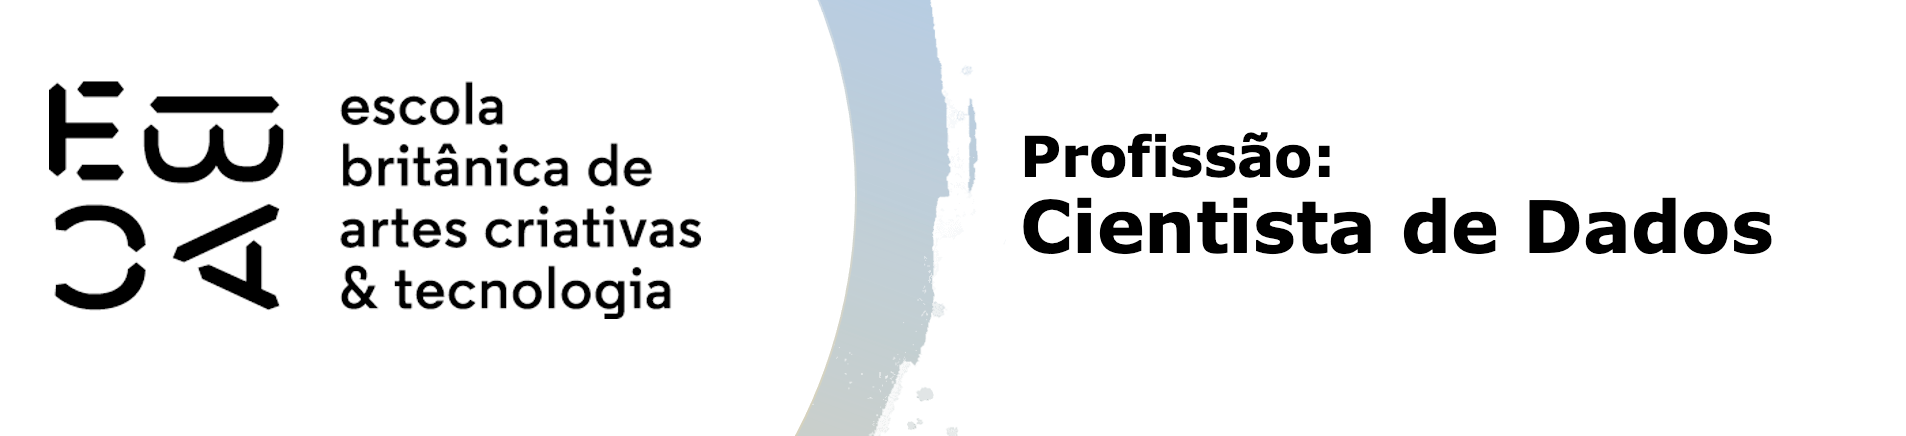

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

In [17]:
dfo = pd.read_csv('online_shoppers_intention.csv')

In [18]:
dfo.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
dfo.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  
0                         0.0               1                 0.000000  
1                         0.0               2                64.000000  


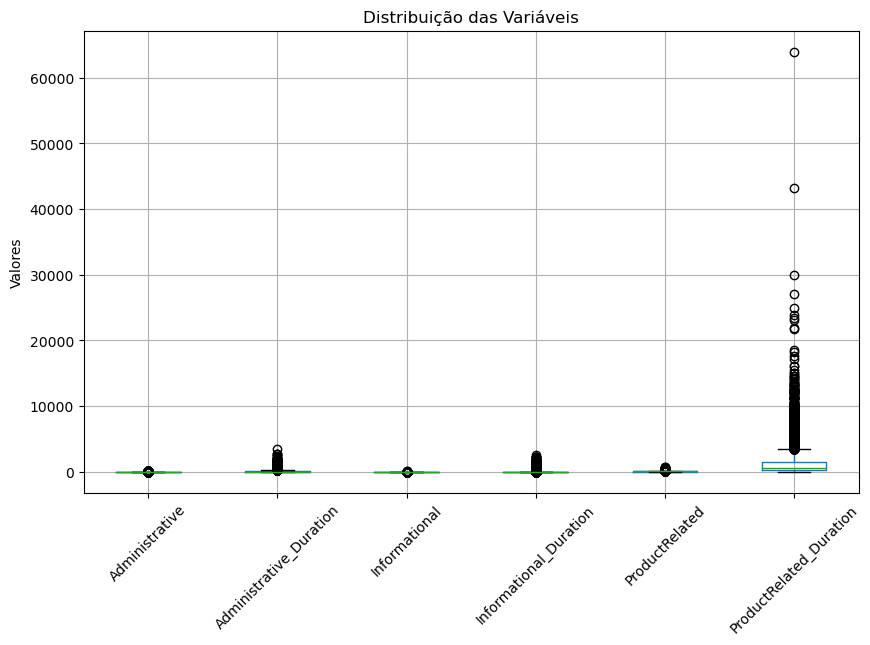

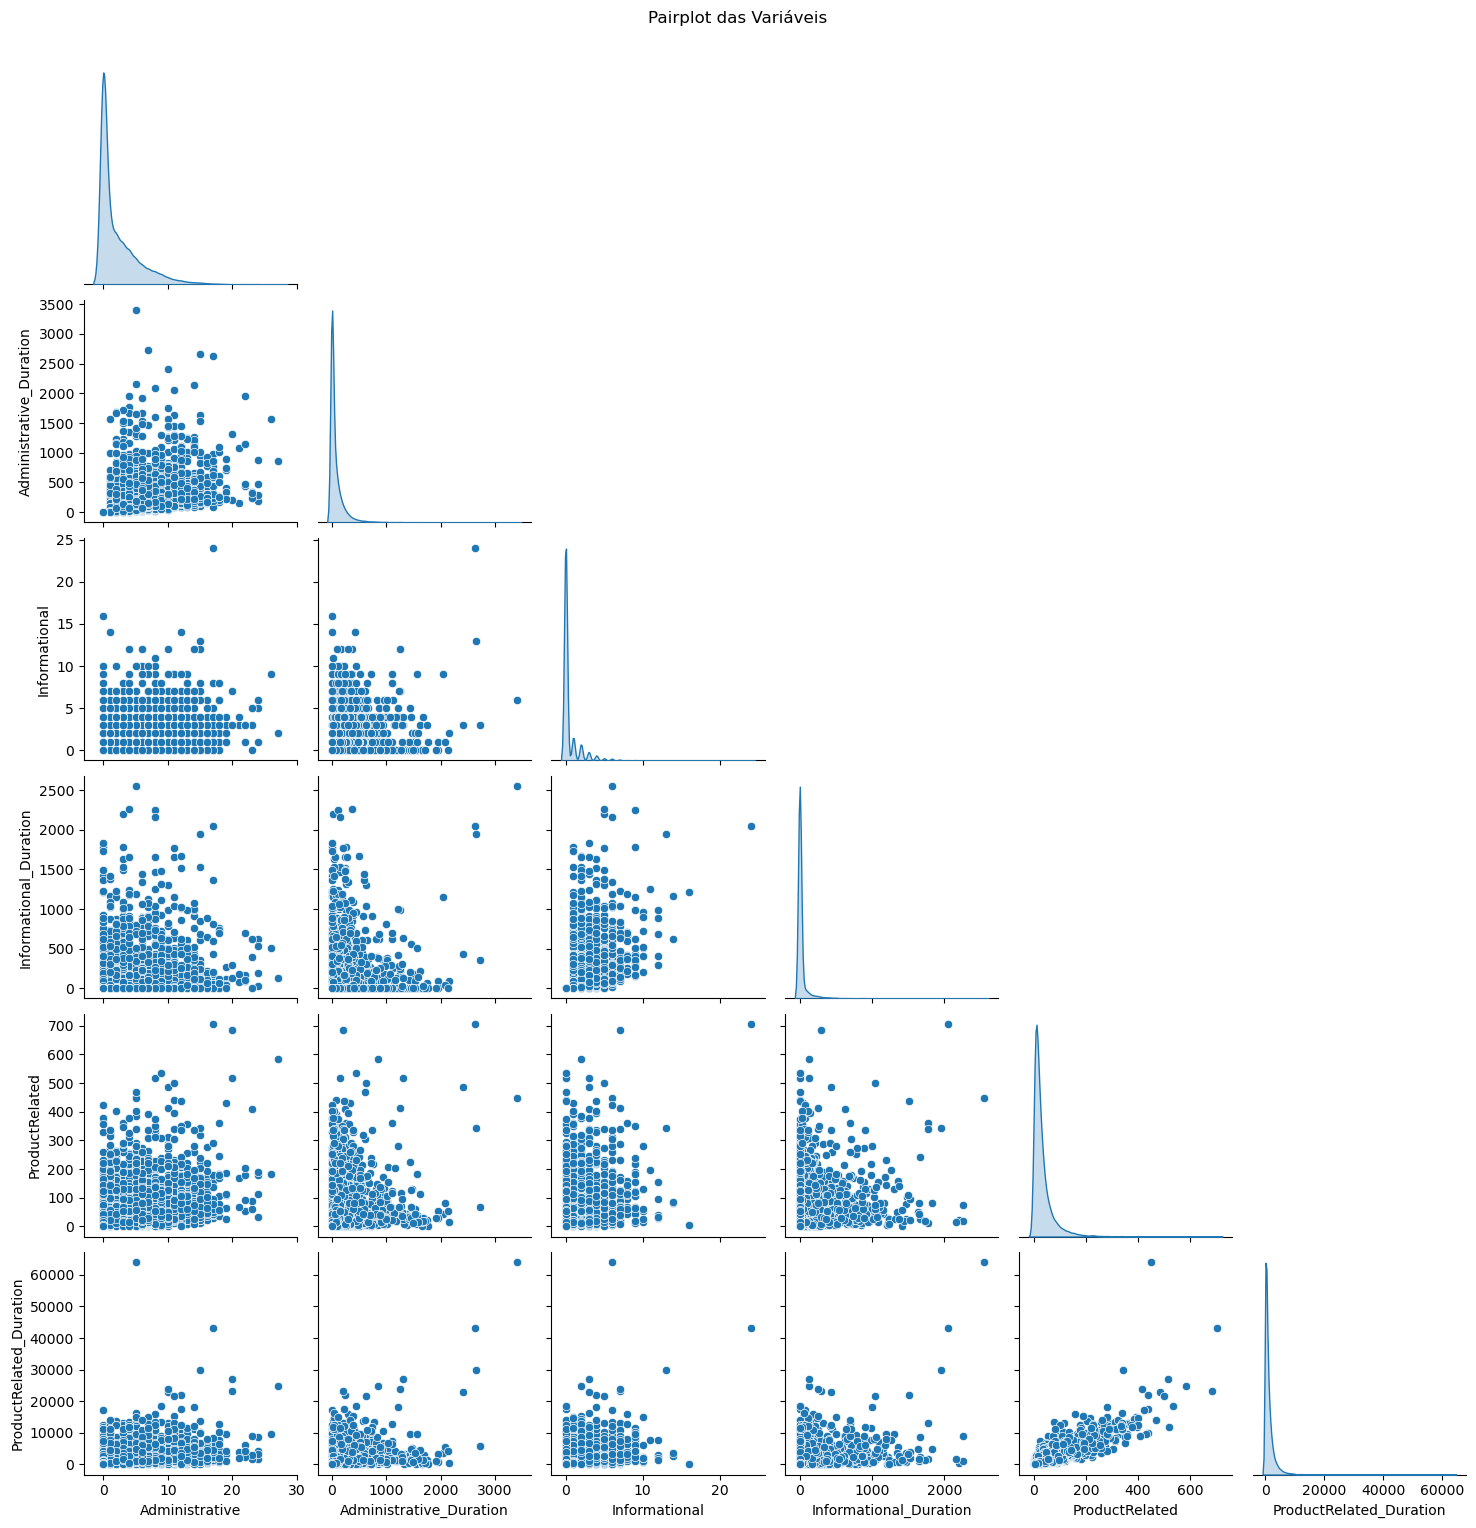

In [5]:
df6 = dfo.iloc[:, :6]

print(df6)

soma_colunas = df6.mean()
df6.columns
# Boxplot para todas as colunas
plt.figure(figsize=(10, 6))
df6.boxplot()
plt.title('Distribuição das Variáveis')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

# Criando o pairplot
sns.pairplot(df6, diag_kind='kde', corner=True)
plt.suptitle('Pairplot das Variáveis', y=1.02)
plt.show()


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

  0%|          | 0/14 [00:00<?, ?it/s]

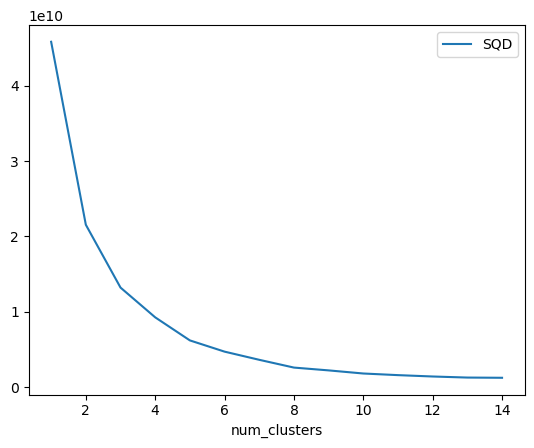

In [6]:
variaveis = ['Administrative', 'Administrative_Duration',  "Informational","Informational_Duration",  "ProductRelated",  "ProductRelated_Duration"] 
SQD = []

K = range(1,15)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(df6[variaveis])
    SQD.append(km.inertia_)

df = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df.plot(x = 'num_clusters', y = 'SQD');

  0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\gerar\AppData\Local\Temp\ipykernel_18928\2022599940.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax.plot(df6.groupby(['grupos_3'])[variaveis].mean().apply(padroniza), 'o ')


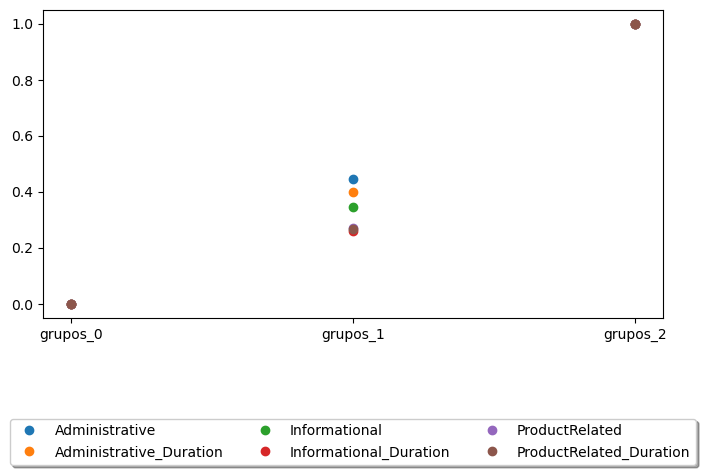

In [34]:

# Este é o número máximo de grupos que vamos testar
max_clusters = 10

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters).fit(df6[variaveis])
    # Essa list comprehendion define o nome dos grupos
    nomes_grupos = ['grupos_' + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    df6['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)
    

padroniza = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df6.groupby(['grupos_3'])[variaveis].mean().apply(padroniza), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)

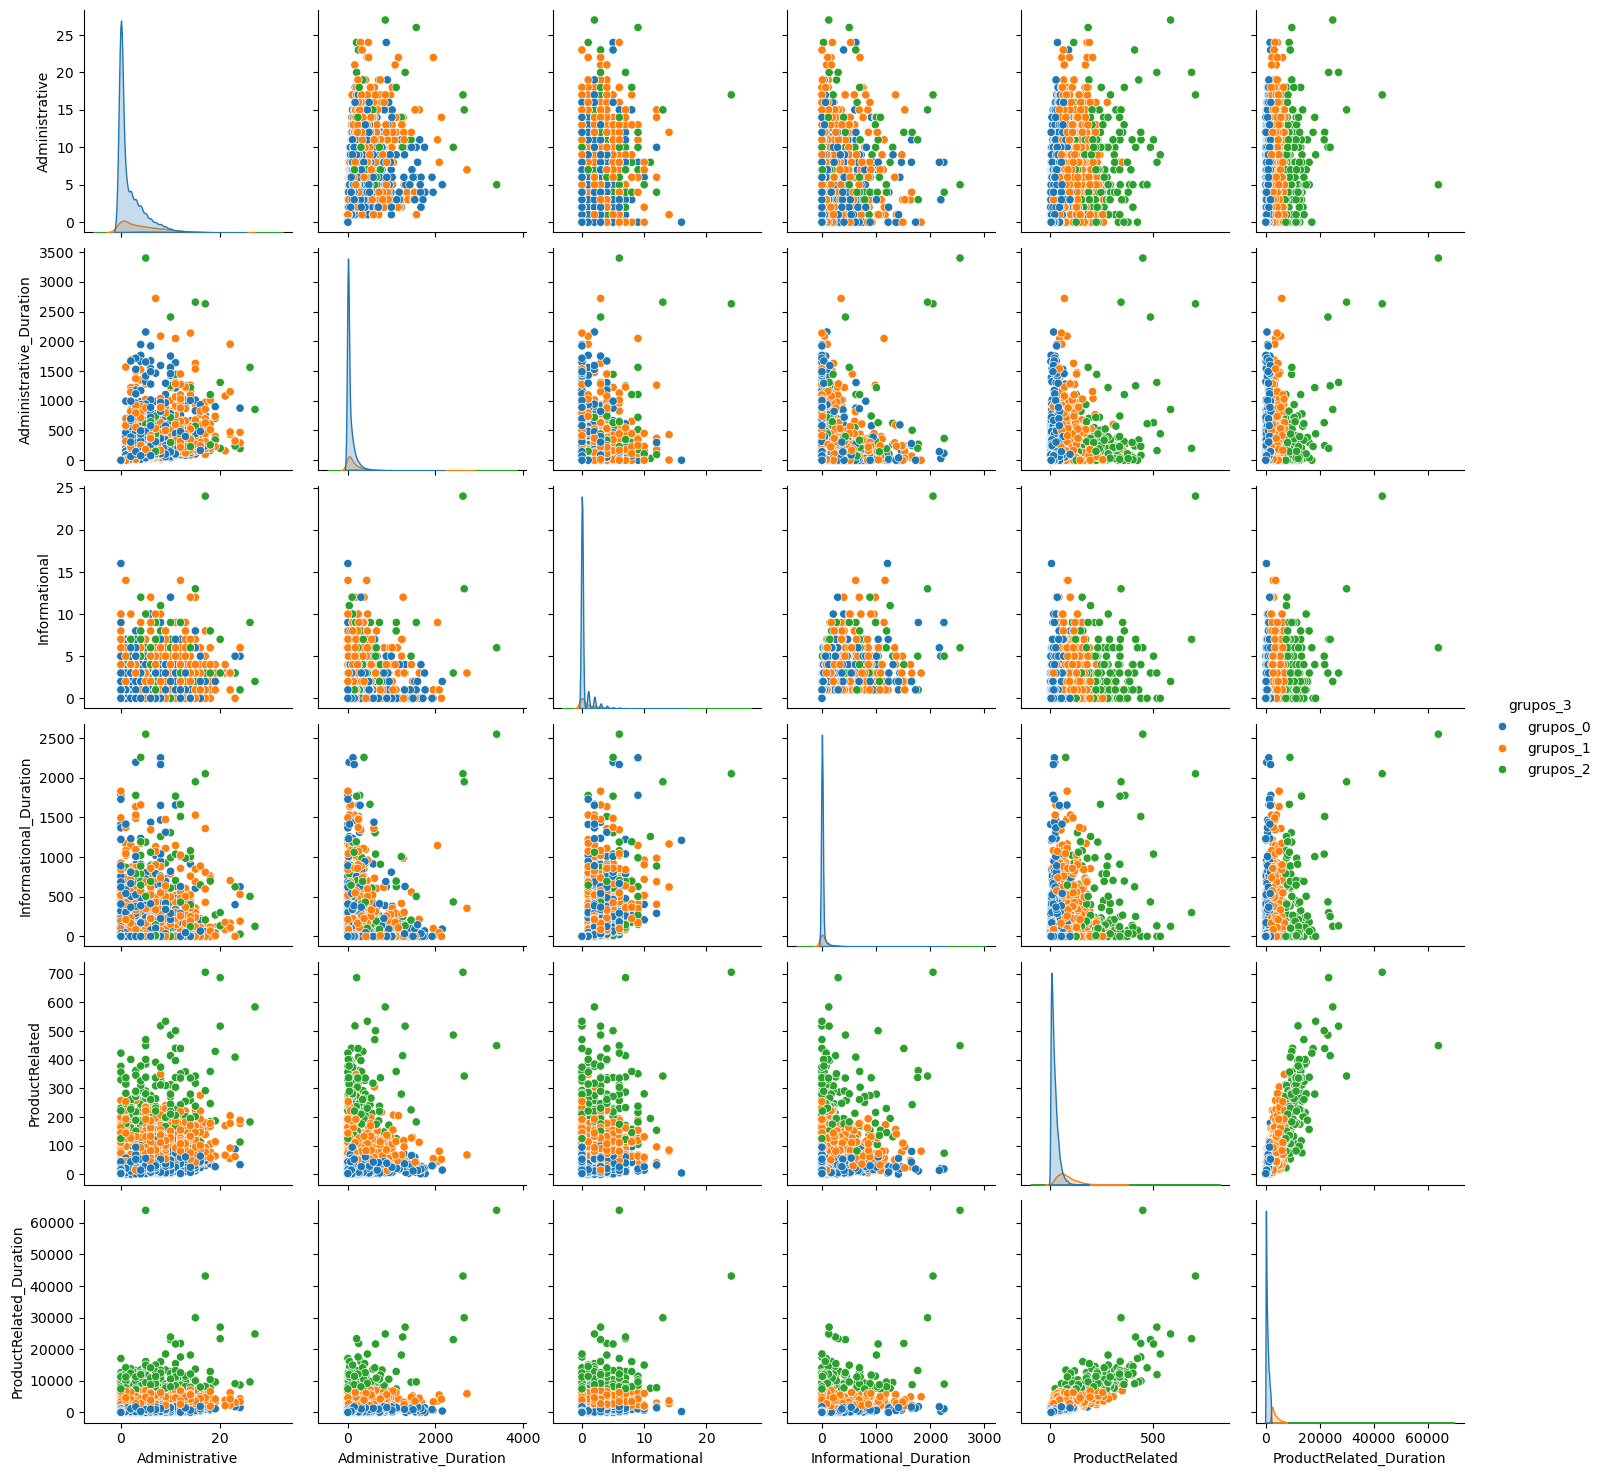

In [9]:
n_clusters = 3
var_grupo = 'grupos_' + str(n_clusters)
sns.pairplot(df6[variaveis + [var_grupo]], hue=var_grupo)

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

>> analisando os 2 graficos acima, o grupo com 2 K seria o mais ideal. pois ele demonstra melhor e separa melhor os 2 grupos, e darei nome de
>> grupo 0 "estudantes" grupo 1 "compradores"
>>
>> fiz a analise com 3 tbm, porem o resultado é quase o mesmo. uma maior parte se concentra no terceiro grupo e 2 grupos quase q iguais se concentram em grupo 1 e 2.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [31]:
# Média de bounce rate e revenue por grupo
df6['revenue'] = dfo['Revenue']
df6['bounce_rate'] = dfo['BounceRates']

df6.groupby('grupos_2')[['revenue']].sum()
#df6.groupby('grupos_3')[['bounce_rate']].mean()


C:\Users\gerar\AppData\Local\Temp\ipykernel_18928\959838834.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df6.groupby('grupos_3')[['revenue']].sum()


,revenue
grupos_3,
grupos_0,496
grupos_1,70
grupos_2,1342


In [33]:
# Média de bounce rate e revenue por grupo
df6.groupby('grupos_4')[['bounce_rate', 'revenue']].sum()
#df6.groupby('grupos_3')[['bounce_rate']].mean()

C:\Users\gerar\AppData\Local\Temp\ipykernel_18928\2215579571.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df6.groupby('grupos_4')[['bounce_rate', 'revenue']].sum()


,bounce_rate,revenue
grupos_4,,
grupos_0,248.149636,1123
grupos_1,3.831251,189
grupos_2,0.364844,26
grupos_3,21.273990,570



# analise final 

>> analisando os dados, vemos que realmente os grupos serao muito mais divididos quando o k é 2. pois pegando a media e a soma do bounce e revenue, vemos claramente que um gropo compra e o outro apenas estuda ou ler.